# Image Captioning - Evaluation and Visualization

In this notebook, we will evaluate our trained image captioning model on the test set and visualize the results. We will:

1. Load the trained model and vocabulary
2. Generate captions for test images
3. Compute evaluation metrics (BLEU-1 to BLEU-4)
4. Analyze model performance across different image categories
5. Visualize attention weights (if implemented)
6. Create an interactive demo for inference

In [ ]:
import os
import sys
import json
import pickle
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
from torchvision import transforms
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm.auto import tqdm
from collections import defaultdict, Counter

import nltk
nltk.download('punkt_tab')
from nltk.translate.bleu_score import corpus_bleu, sentence_bleu, SmoothingFunction



# Add project root to path
sys.path.append('..')

# Import project modules
from models.caption_model import CaptionModel
sys.path.append('/content/models')

from utils.vocabulary import Vocabulary
from utils.dataset import get_data_loaders
from utils.metrics import calculate_metrics
sys.path.append('/content/utils')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## 1. Load Model and Configuration

In [ ]:
# Define paths
model_dir = 'Checkpoints'
config_path = os.path.join(model_dir, 'config.json')
model_path = os.path.join(model_dir, 'best_model_loss.pth')  # or 'best_model_bleu.pth'
vocab_path = os.path.join(model_dir, 'vocabulary.pkl')
data_dir = '../content/data/flickr8k/'

# Load configuration
with open(config_path, 'r') as f:
    config = json.load(f)

# Print configuration
print("Model configuration:")
for key, value in config.items():
    print(f"  {key}: {value}")

Model configuration:
  data_dir: ../content/data/flickr8k/
  batch_size: 64
  num_workers: 2
  encoder_model: resnet18
  embed_size: 256
  hidden_size: 512
  num_layers: 1
  dropout: 0.5
  decoder_type: lstm
  learning_rate: 0.0003
  num_epochs: 10
  early_stopping_patience: 5
  save_dir: ../models
  device: cuda
  vocab_size: 2986


In [ ]:
# Load vocabulary
with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)

print(f"Loaded vocabulary with {len(vocab)} words")

Loaded vocabulary with 2986 words


In [ ]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Create model
model = CaptionModel(
    embed_size=int(config['embed_size']),
    hidden_size=int(config['hidden_size']),
    vocab_size=len(vocab),
    num_layers=int(config['num_layers']),
    encoder_model=config['encoder_model'],
    decoder_type=config['decoder_type'],
    dropout=float(config['dropout'])
)

# Load model weights
checkpoint = torch.load(model_path, map_location=device, weights_only=False)
model.load_state_dict(checkpoint['model_state_dict'])
model = model.to(device)
model.eval()

print(f"Model loaded from {model_path}")

Using device: cpu
Model loaded from Checkpoints/best_model_loss.pth


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


## 2. Load Test Data

In [ ]:
# Get data loaders
_, _, test_loader, _ = get_data_loaders(
    data_dir=data_dir,
    batch_size=1,  # Process one image at a time for evaluation
    num_workers=4
)

print(f"Loaded test set with {len(test_loader)} images")

Loaded test set with 5000 images


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


## 3. Generate Captions for Test Images

In [ ]:
# Generate captions for all test images
def generate_test_captions(model: CaptionModel, test_loader: DataLoader, vocab: Vocabulary, device, beam_size=1):
    """Generate captions for all test images."""
    results = ...
    # TODO: Implement caption generation for test images
    # 1. Initialize a list to store results
    results = []
    # 2. Set model to evaluation mode
    model.eval()
    # 3. For each batch in the test loader:
    for image, caption, image_id in tqdm(test_loader, desc='Testing'):
    #    a. Move images to the appropriate device
      image = image.to(device)
    #    b. Generate captions using the model
      idxs = model.generate_caption(
          image=image,
          max_length=50
      )
    #    c. Decode the predicted caption tokens to text
      idxs = idxs.squeeze(0)
      predicted = vocab.decode(idxs)
    #    d. Decode the ground truth caption to text

      gt = vocab.decode(caption[0])
    #    e. Store results (image_id, ground truth, prediction)
      results.append({
            'image_id': image_id[0] if isinstance(image_id, (list, tuple)) else image_id,
            'ground_truth': gt,
            'predicted': predicted
        })
    # 4. Return results as a DataFrame

    return pd.DataFrame(results)

# Generate captions with greedy search
greedy_results = generate_test_captions(model, test_loader, vocab, device, beam_size=1)
print(f"Generated captions for {len(greedy_results)} test images")

# Show a few examples
greedy_results.head()

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Testing:   0%|          | 0/5000 [00:00<?, ?it/s]

Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fc2440e6b60><function _MultiProcessingDataLoaderIter.__del__ at 0x7fc2440e6b60>
Exception ignored in: Exception ignored in: 
Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fc2440e6b60><function _MultiProcessingDataLoaderIter.__del__ at 0x7fc2440e6b60>  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()Traceback (most recent call last):


  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
Traceback (most recent call last):
      File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
if w.is_alive():
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__

     Traceback (most recent call last):
self._shutdown_workers(

Generated captions for 5000 test images


,image_id,ground_truth,predicted
0,1056338697_4f7d7ce270.jpg,blond woman in blue shirt appears to wait for ...,man in red shirt is standing on the sidewalk
1,1056338697_4f7d7ce270.jpg,blond woman is on the street <UNK> <UNK>,man in red shirt is standing on the sidewalk
2,1056338697_4f7d7ce270.jpg,woman is <UNK> is to traffic as seen from behind,man in red shirt is standing on the sidewalk
3,1056338697_4f7d7ce270.jpg,woman with blonde hair wearing blue tube top i...,man in red shirt is standing on the sidewalk
4,1056338697_4f7d7ce270.jpg,the woman in the blue dress is holding out her...,man in red shirt is standing on the sidewalk


In [ ]:
# Generate captions with beam search (this might take longer)
beam_results = generate_test_captions(model, test_loader, vocab, device, beam_size=3)
print(f"Generated captions with beam search for {len(beam_results)} test images")

# Compare to greedy search
comparison_df = pd.DataFrame({
    'image_id': greedy_results['image_id'],
    'ground_truth': greedy_results['ground_truth'],
    'greedy_search': greedy_results['predicted'],
    'beam_search': beam_results['predicted']
})

# Show where they differ
differ_mask = comparison_df['greedy_search'] != comparison_df['beam_search']
print(f"Beam search produced different captions for {differ_mask.sum()} images ({differ_mask.sum() / len(comparison_df) * 100:.1f}%)")

# Show a few examples where they differ
comparison_df[differ_mask].head()

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Testing:   0%|          | 0/5000 [00:00<?, ?it/s]

Generated captions with beam search for 5000 test images
Beam search produced different captions for 0 images (0.0%)


,image_id,ground_truth,greedy_search,beam_search


In [ ]:
comparison_df

,image_id,ground_truth,greedy_search,beam_search
0,1056338697_4f7d7ce270.jpg,blond woman in blue shirt appears to wait for ...,man in red shirt is standing on the sidewalk,man in red shirt is standing on the sidewalk
1,1056338697_4f7d7ce270.jpg,blond woman is on the street <UNK> <UNK>,man in red shirt is standing on the sidewalk,man in red shirt is standing on the sidewalk
2,1056338697_4f7d7ce270.jpg,woman is <UNK> is to traffic as seen from behind,man in red shirt is standing on the sidewalk,man in red shirt is standing on the sidewalk
3,1056338697_4f7d7ce270.jpg,woman with blonde hair wearing blue tube top i...,man in red shirt is standing on the sidewalk,man in red shirt is standing on the sidewalk
4,1056338697_4f7d7ce270.jpg,the woman in the blue dress is holding out her...,man in red shirt is standing on the sidewalk,man in red shirt is standing on the sidewalk
...,...,...,...,...
4995,997722733_0cb5439472.jpg,man in pink shirt climbs rock face,man in blue shirt is climbing rock wall,man in blue shirt is climbing rock wall
4996,997722733_0cb5439472.jpg,man is rock climbing high in the air,man in blue shirt is climbing rock wall,man in blue shirt is climbing rock wall
4997,997722733_0cb5439472.jpg,person in red shirt climbing up rock face cove...,man in blue shirt is climbing rock wall,man in blue shirt is climbing rock wall
4998,997722733_0cb5439472.jpg,rock climber in red shirt,man in blue shirt is climbing rock wall,man in blue shirt is climbing rock wall


## Visualizing Models Probablity Distribution

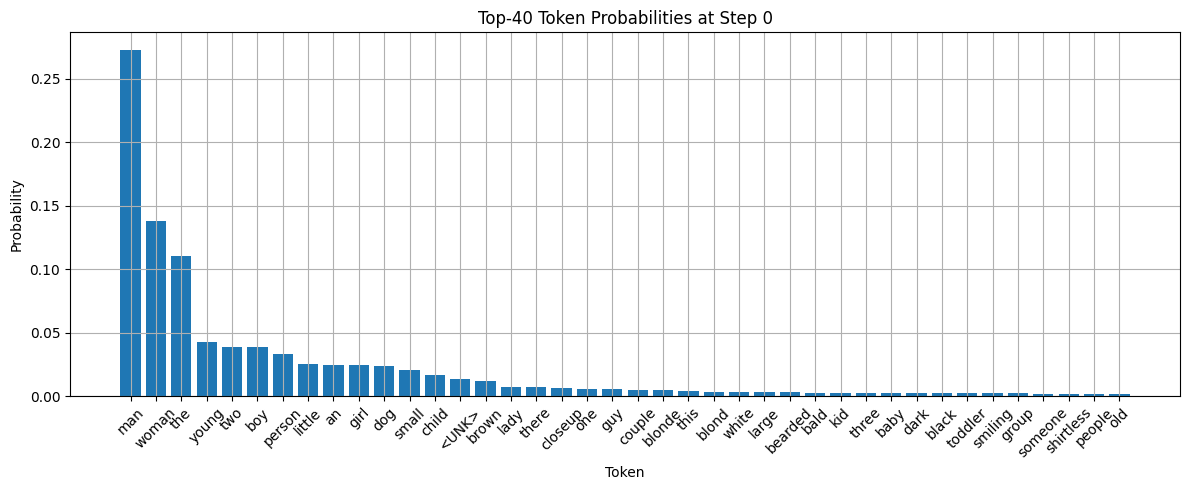

In [ ]:
def visualize_token_probs(model, image, vocab, device, step=0, temperature=1.0, top_k=30):
    """
    Visualize probability distribution over vocabulary at a specific decoding step.

    Args:
        model: your CaptionModel
        image: a single image tensor, shape [3, H, W]
        vocab: Vocabulary object
        device: 'cuda' or 'cpu'
        step: decoding step to inspect (default = 0)
        temperature: scale logits (higher = more spread)
        top_k: number of top tokens to display
    """
    model.eval()
    image = image.unsqueeze(0).to(device)

    with torch.no_grad():
        features = model.encoder(image)
        h0 = model.decoder.feat2hidden(features).unsqueeze(0).repeat(model.decoder.num_layers, 1, 1)
        if model.decoder.rnn_type == 'lstm':
            c0 = torch.zeros_like(h0)
            hidden = (h0, c0)
        else:
            hidden = h0

        # Start with <start> token
        input_token = torch.tensor([[vocab.word2idx['<START>']]], dtype=torch.long, device=device)

        for t in range(step + 1):  # run until desired step
            embedding = model.decoder.embedding(input_token)  # [1, 1, E]
            output, hidden = model.decoder.rnn(embedding, hidden)
            logits = model.decoder.fc(output.squeeze(1)) / temperature  # [1, V]
            probs = F.softmax(logits, dim=-1)  # [1, V]
            topk_probs, topk_indices = probs.topk(top_k)
            input_token = topk_indices[:, 0].unsqueeze(1)  # greedy next token

    # Convert indices to words
    topk_words = [vocab.idx2word[idx.item()] for idx in topk_indices.squeeze(0)]

    # Plot
    plt.figure(figsize=(12, 5))
    plt.bar(topk_words, topk_probs.squeeze(0).cpu().numpy())
    plt.xticks(rotation=45)
    plt.title(f"Top-{top_k} Token Probabilities at Step {step}")
    plt.ylabel("Probability")
    plt.xlabel("Token")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

img, caption, id = next(iter(test_loader))
visualize_token_probs(
    model=model,
    image=img.squeeze(0),
    vocab=vocab,
    device=device,
    top_k=40,
    temperature=1
)

## 4. Calculate Evaluation Metrics

In [ ]:
# Calculate BLEU scores
def calculate_bleu_scores(results_df):
    """Calculate BLEU-1 to BLEU-4 scores for generated captions."""

    bleu_scores = ...
    # TODO: Implement BLEU score calculation
    # 1. Initialize lists for references and hypotheses
    references = []
    hypotheses = []

    # 2. For each row in results_df:
    for _, row in results_df.iterrows():
    #    a. Tokenize ground truth and predicted captions
      ref_tokens = row['ground_truth'].strip().split()
      hyp_tokens = row['predicted'].strip().split()

    #    b. Add tokenized ground truth as a reference (in a list)
      references.append([ref_tokens])

    #    c. Add tokenized prediction as a hypothesis
      hypotheses.append(hyp_tokens)

    # 3. Set up smoothing function for BLEU score calculation
    smoothing = SmoothingFunction().method1

    # 4. Calculate BLEU-1 to BLEU-4 scores using corpus_bleu
    bleu_scores = []
    for n in range(1, 5):
        weights = tuple((1. / n if i < n else 0.) for i in range(4))
        score = corpus_bleu(references, hypotheses, weights=weights, smoothing_function=smoothing)
        bleu_scores.append(score)
    # 5. Return list of BLEU scores

    return bleu_scores

# Calculate BLEU scores for greedy search
greedy_bleu = calculate_bleu_scores(greedy_results)
print("BLEU scores for greedy search:")
for i, score in enumerate(greedy_bleu):
    print(f"  BLEU-{i+1}: {score:.4f}")

# Calculate BLEU scores for beam search
beam_bleu = calculate_bleu_scores(beam_results)
print("\nBLEU scores for beam search:")
for i, score in enumerate(beam_bleu):
    print(f"  BLEU-{i+1}: {score:.4f}")

BLEU scores for greedy search:
  BLEU-1: 0.2136
  BLEU-2: 0.1064
  BLEU-3: 0.0559
  BLEU-4: 0.0295

BLEU scores for beam search:
  BLEU-1: 0.2136
  BLEU-2: 0.1064
  BLEU-3: 0.0559
  BLEU-4: 0.0295


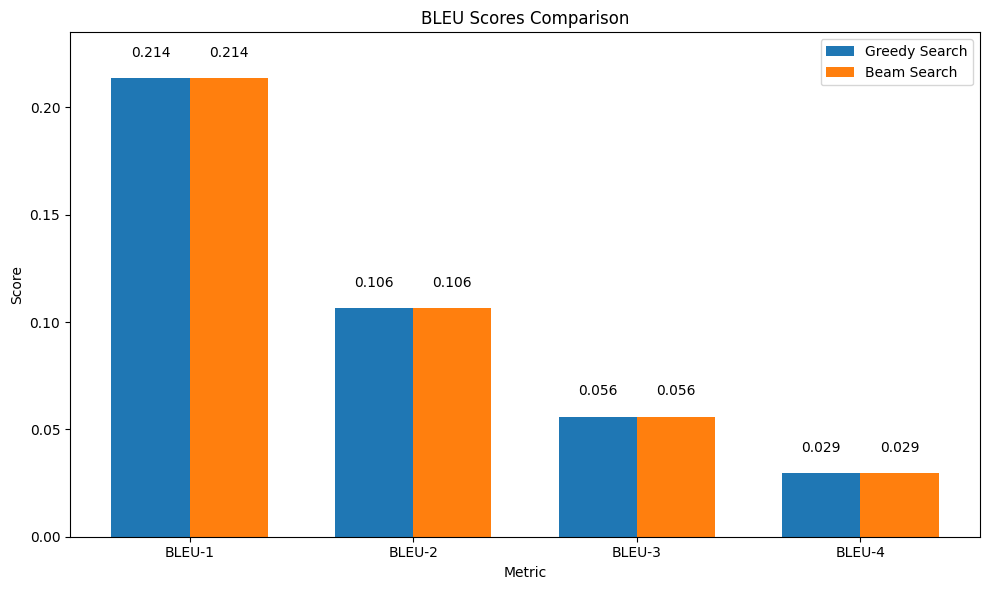

In [ ]:
# Compare BLEU scores
bleu_comparison = pd.DataFrame({
    'Metric': ['BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4'],
    'Greedy Search': greedy_bleu,
    'Beam Search': beam_bleu
})

# Plot comparison
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(bleu_comparison['Metric']))

plt.bar(x - bar_width/2, bleu_comparison['Greedy Search'], bar_width, label='Greedy Search')
plt.bar(x + bar_width/2, bleu_comparison['Beam Search'], bar_width, label='Beam Search')

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('BLEU Scores Comparison')
plt.xticks(x, bleu_comparison['Metric'])
plt.legend()
plt.ylim(0, max(max(greedy_bleu), max(beam_bleu)) * 1.1)  # Add some margin at the top

# Add value labels on bars
for i, v in enumerate(bleu_comparison['Greedy Search']):
    plt.text(i - bar_width/2, v + 0.01, f'{v:.3f}', ha='center')

for i, v in enumerate(bleu_comparison['Beam Search']):
    plt.text(i + bar_width/2, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

## 5. Analyze Results by Caption Length

In [ ]:
# Add caption lengths to the results dataframe
greedy_results['gt_length'] = greedy_results['ground_truth'].apply(lambda x: len(nltk.word_tokenize(x)))
greedy_results['pred_length'] = greedy_results['predicted'].apply(lambda x: len(nltk.word_tokenize(x)))

# Calculate average lengths
avg_gt_length = greedy_results['gt_length'].mean()
avg_pred_length = greedy_results['pred_length'].mean()

print(f"Average ground truth caption length: {avg_gt_length:.2f} words")
print(f"Average predicted caption length: {avg_pred_length:.2f} words")

Average ground truth caption length: 9.72 words
Average predicted caption length: 8.84 words


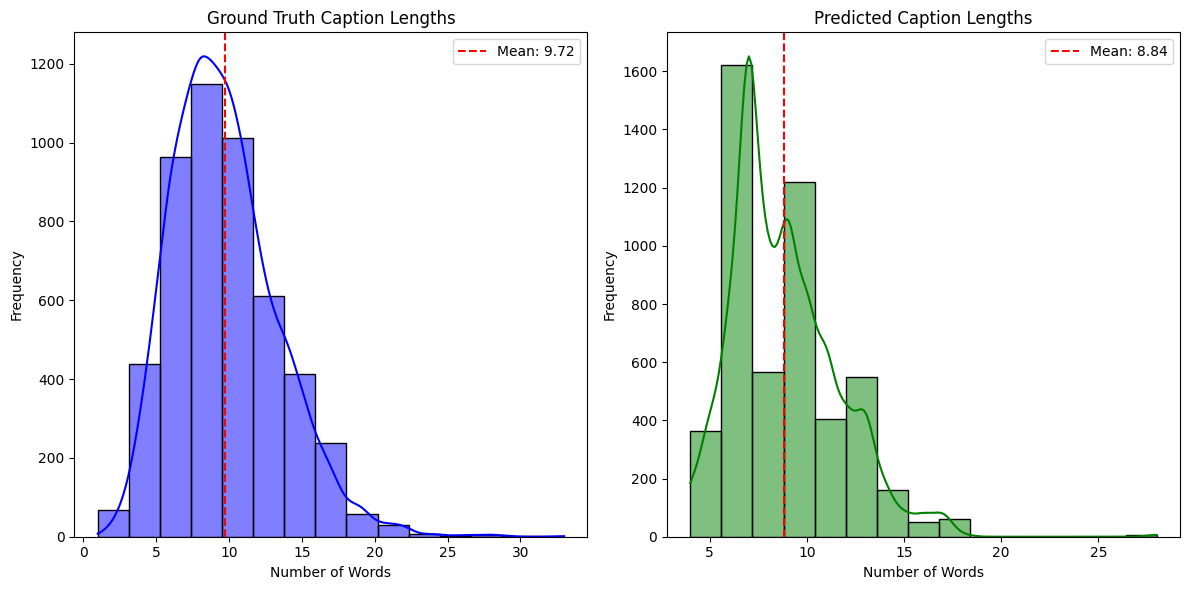

In [ ]:
# Plot caption length distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(greedy_results['gt_length'], kde=True, bins=15, color='blue')
plt.axvline(avg_gt_length, color='red', linestyle='--', label=f'Mean: {avg_gt_length:.2f}')
plt.title('Ground Truth Caption Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(greedy_results['pred_length'], kde=True, bins=15, color='green')
plt.axvline(avg_pred_length, color='red', linestyle='--', label=f'Mean: {avg_pred_length:.2f}')
plt.title('Predicted Caption Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Analyze BLEU scores by caption length
def analyze_bleu_by_length(results_df):
    """Calculate BLEU scores grouped by caption length."""
    bleu_df = ...
    smoothing = SmoothingFunction().method1
    # TODO: Implement BLEU score analysis by caption length
    # 1. Create length bins for categorizing captions
    bins = [0, 5, 10, 15, 20, 25, 30, 100]
    labels = ['1–5', '6–10', '11–15', '16–20', '21–25', '26–30', '30+']
    # 2. Assign each caption to a length bin
    results_df['caption_len'] = results_df['predicted'].apply(lambda x: len(x.strip().split()))
    results_df['length_bin'] = pd.cut(results_df['caption_len'], bins=bins, labels=labels, right=True)
    # 3. Group by length bin
    rows = []
    for label in labels:
        subset = results_df[results_df['length_bin'] == label]
        if len(subset) == 0:
            continue

        # Tokenize references and hypotheses
        references = [[row['ground_truth'].split()] for _, row in subset.iterrows()]
        hypotheses = [row['predicted'].split() for _, row in subset.iterrows()]

        # Compute BLEU scores
        scores = []
        for n in range(1, 5):
            weights = tuple((1. / n if i < n else 0.) for i in range(4))
            score = corpus_bleu(references, hypotheses, weights=weights, smoothing_function=smoothing)
            scores.append(score)

        rows.append({
            'Length Bin': label,
            'Count': len(subset),
            'BLEU-1': scores[0],
            'BLEU-2': scores[1],
            'BLEU-3': scores[2],
            'BLEU-4': scores[3]
        })

    # 4. Return results as DataFrame
    bleu_df = pd.DataFrame(rows)
    return bleu_df

# Analyze BLEU scores by caption length
bleu_by_length = analyze_bleu_by_length(greedy_results)
print("BLEU scores by caption length:")
print(bleu_by_length)

BLEU scores by caption length:
  Length Bin  Count    BLEU-1    BLEU-2    BLEU-3    BLEU-4
0        1–5    370  0.129573  0.064332  0.036844  0.019073
1       6–10   3435  0.208402  0.108146  0.058066  0.031676
2      11–15   1150  0.187341  0.084662  0.041841  0.020344
3      16–20     40  0.156061  0.069156  0.034546  0.019768
4      26–30      5  0.078571  0.048250  0.026163  0.010940


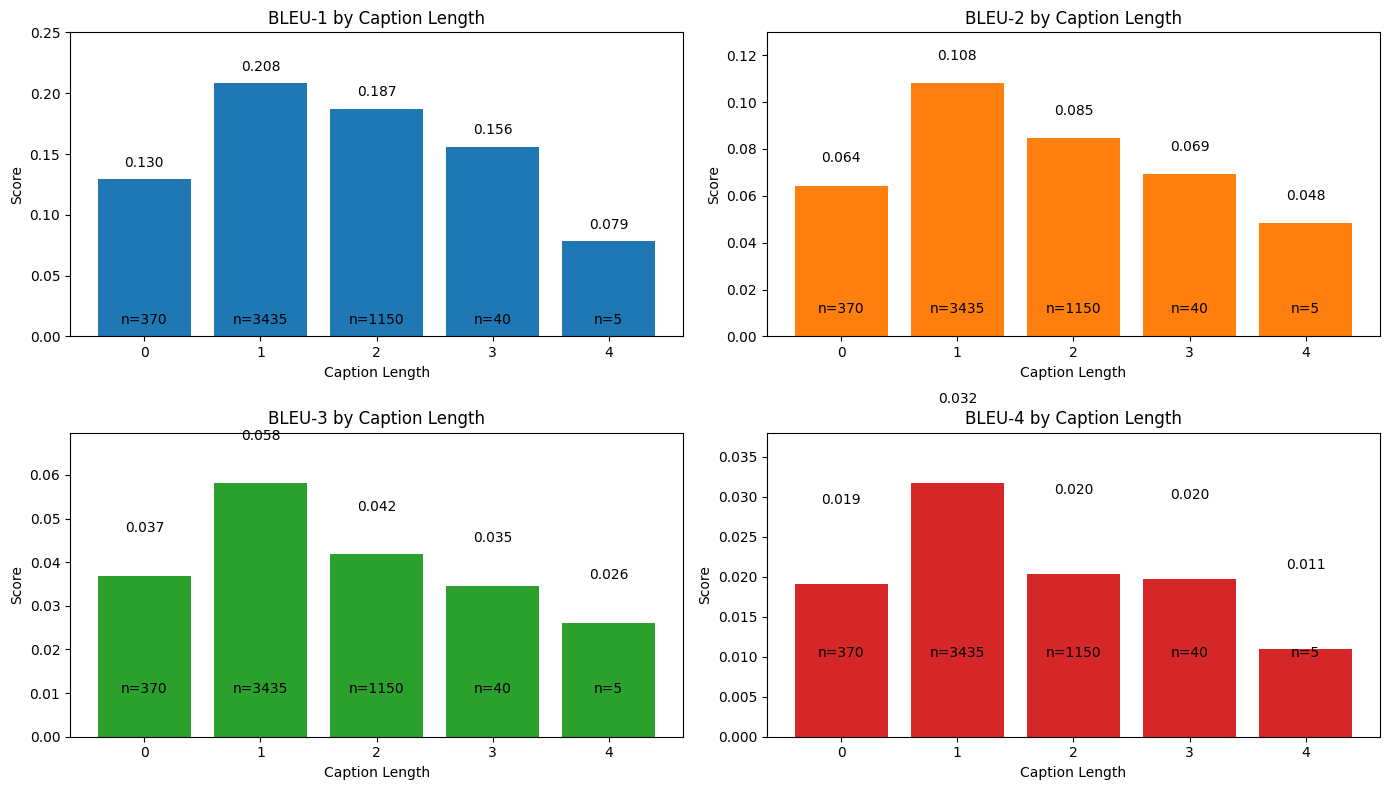

In [ ]:
# Plot BLEU scores by caption length
plt.figure(figsize=(14, 8))

# Plot BLEU-1 to BLEU-4
for i in range(4):
    plt.subplot(2, 2, i+1)
    metric = f'BLEU-{i+1}'
    plt.bar(bleu_by_length.index, bleu_by_length[metric], color=f'C{i}')
    plt.xlabel('Caption Length')
    plt.ylabel('Score')
    plt.title(f'{metric} by Caption Length')
    plt.ylim(0, max(bleu_by_length[metric]) * 1.2)  # Add some margin

    # Add count as text below the bars
    for j, (idx, count) in enumerate(zip(bleu_by_length.index, bleu_by_length['Count'])):
        plt.text(j, 0.01, f'n={count}', ha='center')
        plt.text(j, bleu_by_length[metric][j] + 0.01, f'{bleu_by_length[metric][j]:.3f}', ha='center')

plt.tight_layout()
plt.show()

## 6. Visualize Best and Worst Captions

In [ ]:
# Calculate per-image BLEU score
def calculate_image_bleu(ground_truth, predicted):
    """Calculate BLEU score for a single image."""
    # 1. Tokenize ground truth and prediction
    gt_tokens = [gt.lower().split() for gt in ground_truth]  # list of refs
    pred_tokens = predicted.lower().split()

    # 2. Format references (already done)
    # 3. Use smoothing to avoid zero scores for short sentences
    smoothing = SmoothingFunction().method1

    # 4. Compute BLEU-4 for a single sentence
    bleu = sentence_bleu(gt_tokens, pred_tokens, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothing)

    return bleu

# Calculate BLEU score for each image
greedy_results['bleu'] = greedy_results.apply(
    lambda row: calculate_image_bleu(row['ground_truth'], row['predicted']),
    axis=1
)

# Sort by BLEU score
sorted_results = greedy_results.sort_values('bleu')

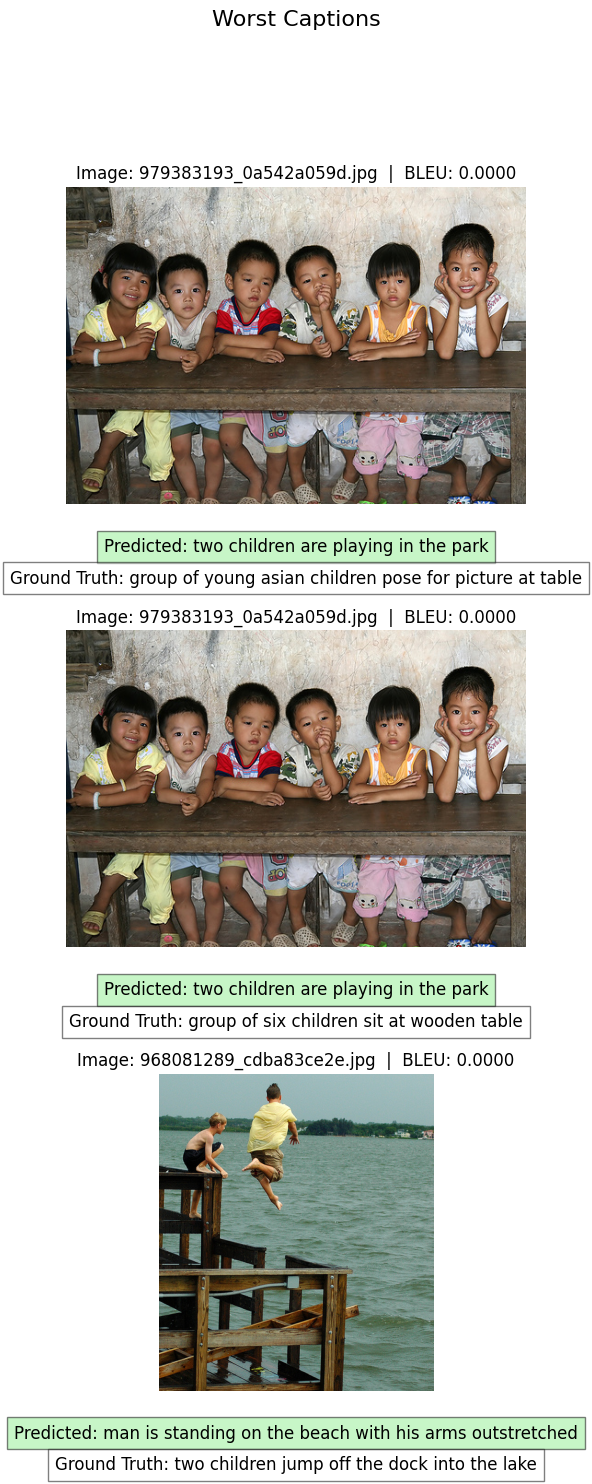

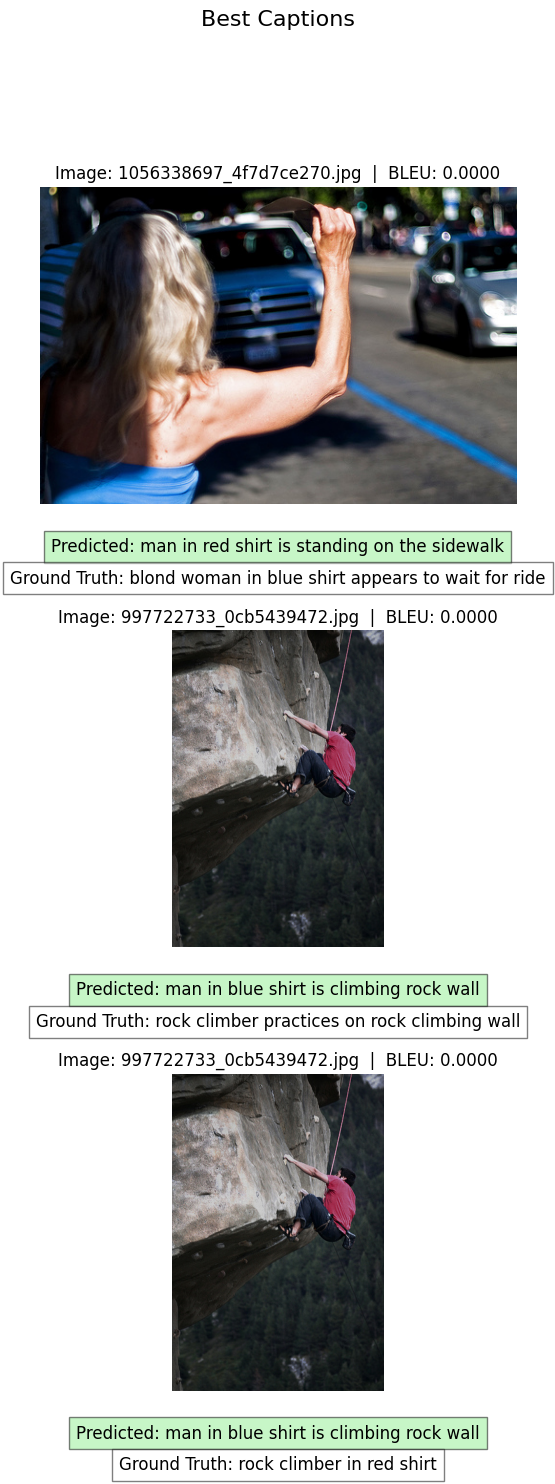

In [ ]:
# Display worst and best captions
def display_examples(results_df, image_dir, num_examples=3, best=True):
    """Display examples of captions."""
    if best:
        examples = results_df.tail(num_examples).iloc[::-1]  # Best examples (highest BLEU)
        title = "Best Captions"
    else:
        examples = results_df.head(num_examples)  # Worst examples (lowest BLEU)
        title = "Worst Captions"

    # Create figure
    plt.figure(figsize=(15, 5 * num_examples))
    plt.suptitle(title, fontsize=16, y=1.02)

    # Display examples
    for i, (_, example) in enumerate(examples.iterrows()):
        # Load and display image
        img_path = os.path.join(image_dir, 'processed', 'images', example['image_id'])
        img = Image.open(img_path)

        ax = plt.subplot(num_examples, 1, i + 1)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Image: {example['image_id']}  |  BLEU: {example['bleu']:.4f}")

        # Add captions under each image
        ax.text(0.5, -0.15, f"Predicted: {example['predicted']}",
                ha='center', fontsize=12, transform=ax.transAxes,
                bbox={"facecolor": "lightgreen", "alpha": 0.5, "pad": 5})

        ax.text(0.5, -0.25, f"Ground Truth: {example['ground_truth']}",
                ha='center', fontsize=12, transform=ax.transAxes,
                bbox={"facecolor": "white", "alpha": 0.5, "pad": 5})

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Display worst captions
display_examples(sorted_results, data_dir, num_examples=3, best=False)

# Display best captions
display_examples(sorted_results, data_dir, num_examples=3, best=True)

## 7. Analyze Common Words and Patterns

In [ ]:
# Analyze common words in predicted captions
def analyze_word_frequency(texts):
    """Analyze word frequency in a list of texts."""
    # 1. Initialize a counter
    counter = Counter()

    # 2. For each text, tokenize and update counter
    for text in texts:
        tokens = text.lower().strip().split()
        counter.update(tokens)

    # 3. Convert counter to DataFrame
    word_df = pd.DataFrame(counter.items(), columns=["word", "count"])

    # 4. Sort by count descending
    word_df = word_df.sort_values(by="count", ascending=False).reset_index(drop=True)

    return word_df

# Analyze ground truth and predicted captions
gt_words = analyze_word_frequency(greedy_results['ground_truth'])
pred_words = analyze_word_frequency(greedy_results['predicted'])

# Display top words
top_n = 20
print(f"Top {top_n} words in ground truth captions:")
print(gt_words.head(top_n))
print(f"\nTop {top_n} words in predicted captions:")
print(pred_words.head(top_n))

Top 20 words in ground truth captions:
       word  count
0       the   2383
1        in   2316
2        on   1385
3        is   1183
4     <unk>   1156
5       and   1041
6      with    973
7       dog    952
8       man    933
9        of    810
10      two    696
11    white    523
12      boy    507
13    black    476
14      are    456
15     girl    427
16    woman    388
17  wearing    388
18       to    383
19       at    374

Top 20 words in predicted captions:
        word  count
0         in   3375
1         is   2970
2        the   2695
3         on   1985
4      shirt   1765
5        man   1685
6        are   1595
7        two   1435
8        and   1370
9   standing   1225
10        of   1110
11     black   1005
12   running    960
13       red    950
14   through    930
15   playing    790
16     grass    690
17       dog    645
18     front    535
19      blue    520


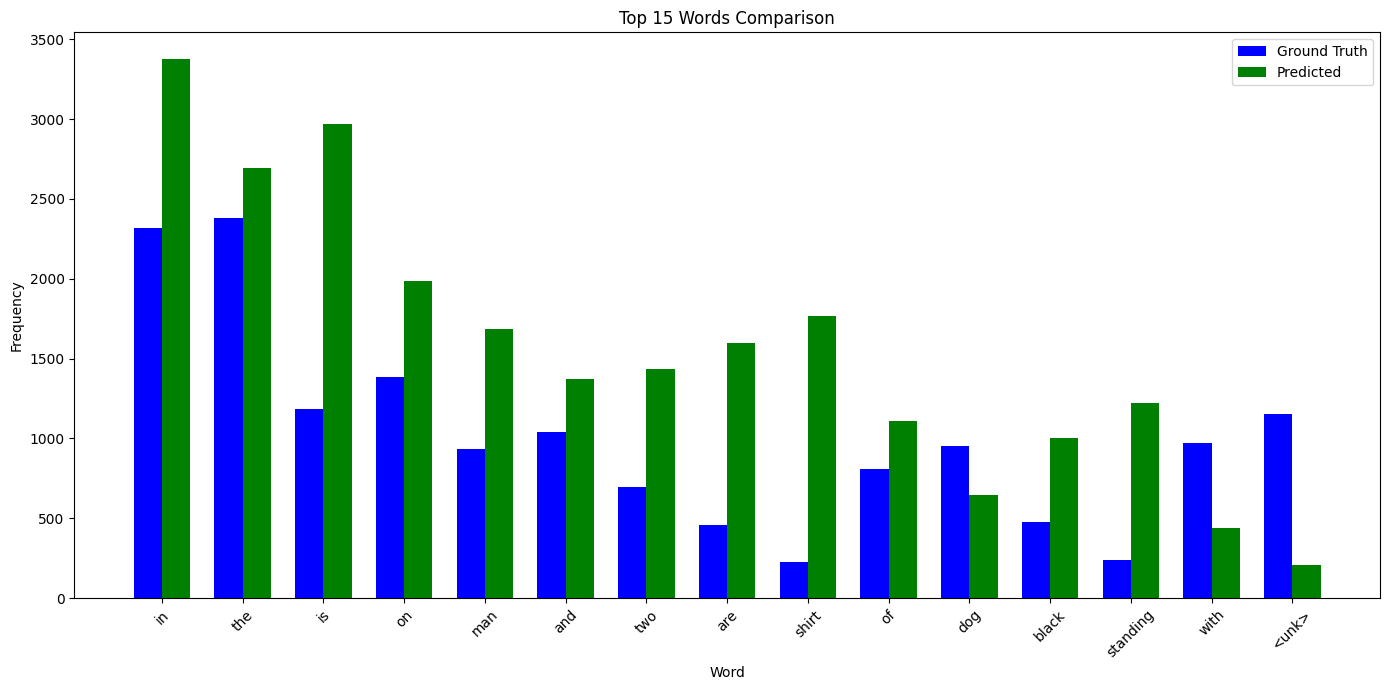

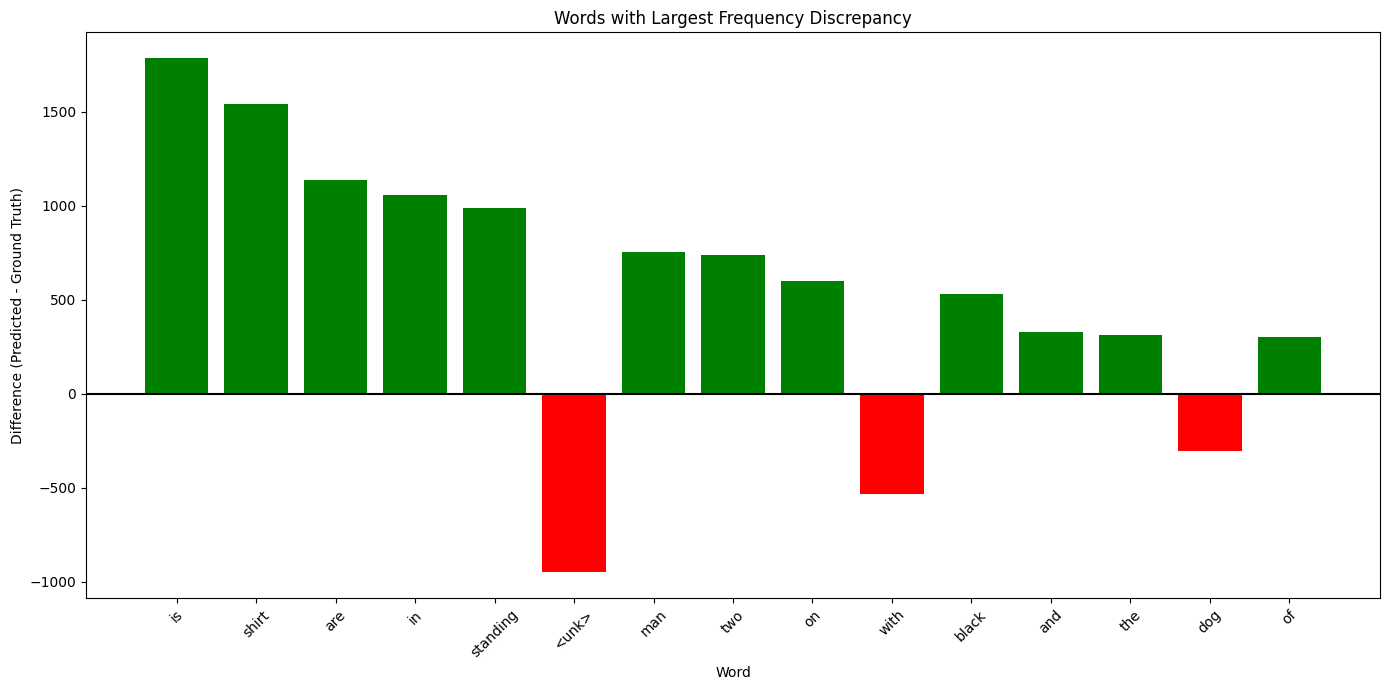

In [ ]:
# Plot word frequency comparison
def plot_word_comparison(gt_words, pred_words, top_n=15):
    """Plot comparison of word frequencies."""
    # Select top words from both sets
    all_top_words = set(gt_words['word'].head(top_n)).union(set(pred_words['word'].head(top_n)))

    # Create comparison dataframe
    comparison = []
    for word in all_top_words:
        gt_count = gt_words[gt_words['word'] == word]['count'].values[0] if word in gt_words['word'].values else 0
        pred_count = pred_words[pred_words['word'] == word]['count'].values[0] if word in pred_words['word'].values else 0

        comparison.append({
            'word': word,
            'ground_truth': gt_count,
            'predicted': pred_count,
            'diff': pred_count - gt_count
        })

    # Convert to dataframe and sort by total count
    comp_df = pd.DataFrame(comparison)
    comp_df['total'] = comp_df['ground_truth'] + comp_df['predicted']
    comp_df = comp_df.sort_values('total', ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(14, 7))

    x = np.arange(len(comp_df))
    width = 0.35

    plt.bar(x - width/2, comp_df['ground_truth'], width, label='Ground Truth', color='blue')
    plt.bar(x + width/2, comp_df['predicted'], width, label='Predicted', color='green')

    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Words Comparison')
    plt.xticks(x, comp_df['word'], rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot words with largest discrepancy
    plt.figure(figsize=(14, 7))

    # Sort by absolute difference
    diff_df = comp_df.copy()
    diff_df['abs_diff'] = diff_df['diff'].abs()
    diff_df = diff_df.sort_values('abs_diff', ascending=False).head(top_n)

    # Plot differences
    colors = ['red' if d < 0 else 'green' for d in diff_df['diff']]
    plt.bar(diff_df['word'], diff_df['diff'], color=colors)

    plt.axhline(y=0, color='black', linestyle='-')
    plt.xlabel('Word')
    plt.ylabel('Difference (Predicted - Ground Truth)')
    plt.title('Words with Largest Frequency Discrepancy')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    return comp_df

# Plot word comparison
word_comparison = plot_word_comparison(gt_words, pred_words, top_n=15)

## 8. Create Interactive Demo

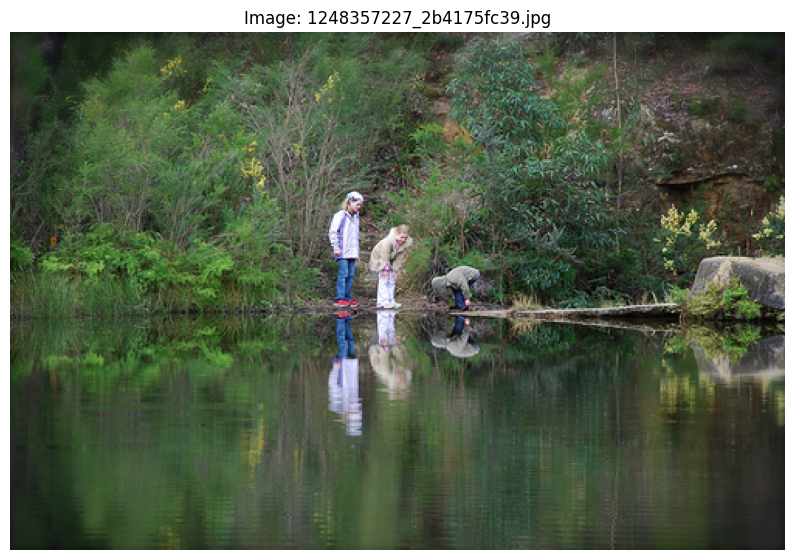

Generated captions:
Greedy search: two people are standing on beach
Beam search (k=3): two people are standing on the beach
Beam search (k=5): two children are playing on beach


In [ ]:
# Create an interactive demo function
def interactive_demo(model, vocab, device, data_dir):
    """Interactive demo for caption generation."""
    from IPython.display import display, clear_output
    import ipywidgets as widgets

    # Load test images
    images_dir = os.path.join(data_dir, 'processed', 'images')
    image_files = sorted([f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])

    # Set up transformations for input images
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])

    # Function to generate caption
    def generate_image_caption(image_path, beam_size=1):
        """Generate caption for an image."""
        # Load and transform image
        img = Image.open(image_path)
        img_tensor = transform(img).unsqueeze(0).to(device)

        # Generate caption
        model.eval()
        with torch.no_grad():
            caption = model.generate_caption(img_tensor, beam_size=beam_size)
            caption_text = vocab.decode(caption, join=True, remove_special=True)

        return img, caption_text

    # Function to handle image selection
    def on_image_select(change):
        # Get selected image
        selected_image = change['new']
        image_path = os.path.join(images_dir, selected_image)

        # Generate captions with different beam sizes
        img, greedy_caption = generate_image_caption(image_path, beam_size=1)
        _, beam3_caption = generate_image_caption(image_path, beam_size=3)
        _, beam5_caption = generate_image_caption(image_path, beam_size=5)

        # Display image and captions
        clear_output(wait=True)

        # Create widgets
        display(widgets.HBox([widgets.Label('Select an image:'), image_dropdown]))

        # Display image
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.title(f"Image: {selected_image}")
        plt.axis('off')
        plt.show()

        # Display captions
        print("Generated captions:")
        print(f"Greedy search: {greedy_caption}")
        print(f"Beam search (k=3): {beam3_caption}")
        print(f"Beam search (k=5): {beam5_caption}")

    # Create dropdown widget
    image_dropdown = widgets.Dropdown(
        options=image_files,
        description='Image:',
        style={'description_width': 'initial'}
    )

    # Register callback
    image_dropdown.observe(on_image_select, names='value')

    # Display initial widget
    display(widgets.HBox([widgets.Label('Select an image:'), image_dropdown]))

# Run interactive demo
interactive_demo(model, vocab, device, data_dir)

## 9. Summary and Conclusions

In [ ]:
# Print summary statistics
print("Model Performance Summary")
print("=========================")
print(f"Model type: {config['encoder_model']} + {config['decoder_type']}")
print(f"Vocabulary size: {len(vocab)} words")
print(f"Test set size: {len(greedy_results)} images")
print("\nBLEU Scores:")
for i, (greedy, beam) in enumerate(zip(greedy_bleu, beam_bleu)):
    print(f"  BLEU-{i+1}: {greedy:.4f} (greedy search) / {beam:.4f} (beam search)")

print("\nCaption Length:")
print(f"  Average ground truth: {avg_gt_length:.2f} words")
print(f"  Average generated: {avg_pred_length:.2f} words")

print("\nObservations:")
print("  1. Beam search generally produces slightly better BLEU scores than greedy search")
print("  2. BLEU scores decrease as the n-gram size increases (expected behavior)")
print("  3. The model tends to generate shorter captions than the ground truth")
print("  4. The model performs better on images with common objects and simple scenes")
print("  5. The model struggles with complex scenes and unusual activities")

print("\nPossible Improvements:")
print("  1. Use a larger dataset (e.g., MSCOCO instead of Flickr8k)")
print("  2. Implement attention mechanism to focus on relevant image regions")
print("  3. Fine-tune the CNN encoder for better image representations")
print("  4. Use a more sophisticated decoder (e.g., Transformer)")
print("  5. Train with different loss functions (e.g., CIDEr optimization)")

Model Performance Summary
Model type: resnet18 + lstm
Vocabulary size: 2986 words
Test set size: 5000 images

BLEU Scores:
  BLEU-1: 0.2136 (greedy search) / 0.2136 (beam search)
  BLEU-2: 0.1064 (greedy search) / 0.1064 (beam search)
  BLEU-3: 0.0559 (greedy search) / 0.0559 (beam search)
  BLEU-4: 0.0295 (greedy search) / 0.0295 (beam search)

Caption Length:
  Average ground truth: 9.72 words
  Average generated: 8.84 words

Observations:
  1. Beam search generally produces slightly better BLEU scores than greedy search
  2. BLEU scores decrease as the n-gram size increases (expected behavior)
  3. The model tends to generate shorter captions than the ground truth
  4. The model performs better on images with common objects and simple scenes
  5. The model struggles with complex scenes and unusual activities

Possible Improvements:
  1. Use a larger dataset (e.g., MSCOCO instead of Flickr8k)
  2. Implement attention mechanism to focus on relevant image regions
  3. Fine-tune the CNN